In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import colorsys
import random
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [127]:
# Create widgets
input_number = widgets.IntText(value=1, description="Enter a number from 1 to 7:")
button = widgets.Button(description="Submit")

# Set up event handler
button.on_click(on_button_click)

IntText(value=1, description='Enter a number from 1 to 7:')

Button(description='Submit', style=ButtonStyle())

In [6]:
#np.save('wrongness.npy', nums2)

vals = list(np.load('wrongness.npy'))
vals

[0.001836935537758655,
 0.35885478367080603,
 0.07558826988151979,
 0.30819155633285666,
 0.6888050304314739,
 0.4282241513009991,
 0.02193519881295125,
 0.2449853465709011,
 0.4929299552955416,
 0.9844767419775557,
 0.770000718683706,
 0.6485052102544886,
 0.23786533499153328,
 0.5219461311068445,
 0.096384120405125,
 0.5554367024510498,
 0.8624867402730965,
 0.44554580909943187,
 0.8251778252217481,
 0.40288645319356764,
 0.6901004023544043,
 0.7676336917083041,
 0.6393331106171294,
 0.25722543021706556,
 0.2694793635227183,
 0.7617844712050561,
 0.938091445875821,
 0.6045769780839391,
 0.36627099161215426,
 0.013165693947010282,
 0.8207586611632482,
 0.8071221526370747,
 0.4663727903999121,
 0.6980365222807966,
 0.23661629216531566,
 0.25627090273077346,
 0.6982749363449707,
 0.20789771897541431,
 0.7148603751076833,
 0.00949037936995778,
 0.7200387967729143,
 0.6565974450457395,
 0.5538161343611395,
 0.49236859384627674,
 0.6434146673098462,
 0.1117289740011631,
 0.4083668449633653

In [2]:
subj = 1

You are a judge making decisions over many cases, all of which have been proven guilty. You are now tasked with choosing their punishment. Importantly, your choice will remain completely anonymous.  If you decide to punish you either incur some cost or gain some reward, seemingly randomly. Each case is represented simply by the colored circle above, 

You are a judge making decisions over many cases, all of which have been proven guilty. You are now tasked with choosing whether or not to punish them. Importantly, your choice and all the details about the case are known and observed by a group of your peers whose opinions you care about. 

If you decide to punish you are completely unaffected. These criminals, seemingly randomly, have all committed crimes of different wrongness. Each case is represented simply by the colored circle above, with the color relative to how  wrong (red) or not wrong at all (green) the crime is. 

For each of the following cases, rate how likely you are to punish the criminal on a scale of 1 (definitely not punish) to 7 (definitely punish):

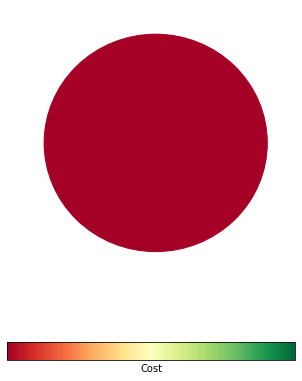

In [7]:
old_col = 10
def save_to_csv(data):
    global subj
    with open("subj_data/subj_%02d.csv" % subj, mode="a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(data)

def gen_circle(b):

    global circle_counter
    global old_col
    if circle_counter >= 51:
        print("Maximum number of circles reached. Stopping.")
        return
    # Clear previous output
    clear_output(wait=True)
    ans = input_number.value
    # Generate a random color from the RdYlGn colormap
    new_col = vals[circle_counter]

    fig, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle((0.5, 0.5), 0.4, color=plt.cm.RdYlGn(new_col))
    ax.add_patch(circle)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # # Display the colorbar below the circle
    cax = fig.add_axes([0.1, -0.1, 0.8, 0.05])  # [left, bottom, width, height]
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="RdYlGn"), cax=cax, orientation='horizontal', ticks=[], label='Cost')
    sns.despine(fig, left=True, bottom=True)

    # Show the plot
    plt.show()

    save_to_csv([old_col, ans])
    circle_counter += 1
    old_col = new_col

# Create widgets
input_number = widgets.IntSlider(value=4, min=1, max=7)
button = widgets.Button(description="Submit")

# Set up event handler
button.on_click(gen_circle)

gen_circle(None)

You are a judge making decisions over many cases, all of which have been proven guilty. You are now tasked with choosing whether or not to punish them. Importantly, your choice and all the details about the case are known and observed by a group of your peers whose opinions you care about. 

These criminals have all committed similar crimes, and the punishment is proportinal to the crime comitted. If you decide to punish you either incur some cost or gain some reward, seemingly randomly. Each case is represented simply by the colored circle above, with the color relative to how much cost (red) or reward (green) you receive. 

For each of the following cases, rate how likely you are to punish the criminal on a scale of 1 (definitely not punish) to 7 (definitely punish):

In [8]:
circle_counter = 0
old_ans = 10
subj += 1

# Display widgets
display(input_number)
display(button)

IntSlider(value=4, max=7, min=1)

Button(description='Submit', style=ButtonStyle())